In [84]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 2)


Automatically created module for IPython interactive environment
[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.15, time = 0.62s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.24, time = 1.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -23.97, time = 0.94s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -23.51, time = 0.94s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -22.81, time = 0.94s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -22.95, time = 0.94s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -22.28, time = 0.94s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -22.19, time = 0.97s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -21.73, time = 0.98s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -21.94, time = 0.93s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -21.45, time = 0.92s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -21.09, time = 0.92s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -21.13, time = 0.91s
[BernoulliRBM] Iteration 14, pseud

IndexError: index out of range

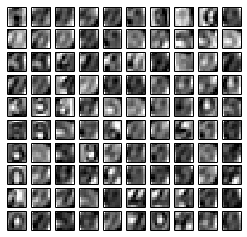

In [97]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


###############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.03
rbm.n_iter = 50
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 200
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

###############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [94]:
numpy.max(images)

16.0

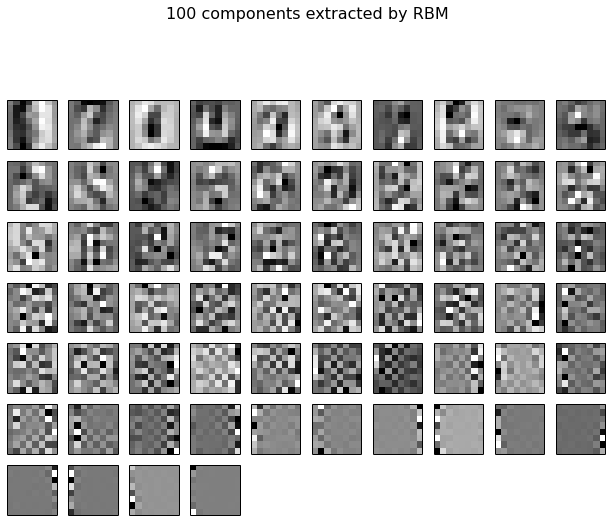

In [92]:
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

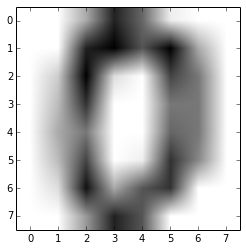

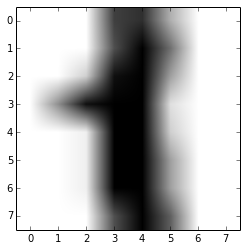

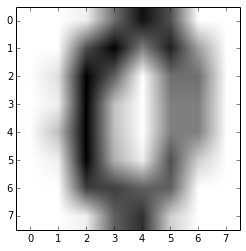

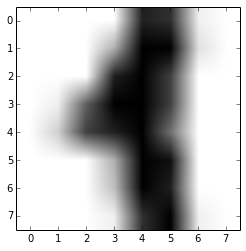

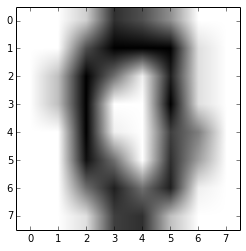

In [21]:
for image in digits.images[:5]:
    plt.imshow(image, cmap=plt.cm.gray_r,)
    plt.show()

In [80]:
images = digits.data
Y = digits.target
print images.shape

(360, 64)


In [73]:
def extract_features(image):
    features = []
    
    image = image.reshape([8,8])
    
    features.append(numpy.sum(image))
    
    return features

In [74]:
import numpy
X = []
for i in range(images.shape[0]):
    X.append(extract_features(images[i]))
X = numpy.array(X)

In [75]:
print X.shape

(360, 1)


In [76]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,train_size = 0.5)

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [78]:
Ypred = model.predict(Xtest)

In [79]:
from sklearn.metrics import accuracy_score
print "test:",accuracy_score(Ypred,Ytest)

test: 0.538888888889


In [81]:
from sklearn.neural_network import BernoulliRBM
m = BernoulliRBM().fit(Xtrain)

In [83]:
m.

(256, 1)